In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger
sys.path.append(os.path.abspath('..'))
from env.env_gym import GuestEnv

In [2]:
def run_env(env, actions, steps=100, seed=42):
    obs, info = env.reset(seed=seed)
    phonemes, rewards = [], []
    for i in range(steps):
        act = actions[i] if i < len(actions) else actions[-1]
        obs, reward, terminated, truncated, info = env.step(act)
        phonemes.append(info['phoneme'].copy())
        rewards.append(reward)
        if terminated or truncated:
            break
    return np.array(phonemes), np.array(rewards)

def run_env_lowest_phoneme(env, action_kind, steps=100, seed=42):
    obs, info = env.reset(seed=seed)
    phonemes, rewards = [], []

    for i in range(steps):
        # Get current phoneme counts from env (or info)
        current_phonemes = getattr(env, "phonemes", info.get("phoneme"))
        
        if current_phonemes is None:
            raise ValueError("Environment or info must expose `phonemes` or `info['phoneme']`.")

        # Choose the participant with the lowest phoneme count
        target = int(np.argmin(current_phonemes))

        # Encourage that participant (action 5 + target)
        action = action_kind + target
        logger.info(f"{action=}, {current_phonemes=}, step={i}")

        obs, reward, terminated, truncated, info = env.step(action)

        # Track data
        phonemes.append(np.array(info["phoneme"], copy=True))
        rewards.append(reward)

        if terminated or truncated:
            break

    return np.array(phonemes), np.array(rewards)


def plot_results(phonemes, rewards, title):
    steps = np.arange(len(rewards))
    plt.figure(figsize=(9,4))
    for a in range(phonemes.shape[1]):
        plt.plot(steps, phonemes[:, a], label=f'Agent {a}')
    plt.xlabel('Step'); plt.ylabel('Phonemes'); plt.title(title + ' - Phonemes')
    plt.legend(); plt.grid(True); plt.show()
    plt.figure(figsize=(9,4))
    plt.plot(steps, rewards, label='Reward')
    plt.xlabel('Step'); plt.ylabel('Reward'); plt.title(title + ' - Reward')
    plt.grid(True); plt.show()

ACTIONS = {
    0: "wait",
    1: "stare_at 0",
    2: "stare_at 1",
    3: "stare_at 2",
    4: "encourage 0",
    5: "encourage 1",
    6: "encourage 2",
}

In [3]:
# Create environment
env = GuestEnv(max_steps=100, reward_shaping=False)

In [ ]:
env.reset()
for i in range(100):
    # if i < 1:
    #     obs, reward, terminated, truncated, info = env.step(1)
    #     print("-------------------------------------------")
    obs, reward, terminated, truncated, info = env.step(4)
    eng = getattr(env, "energy")
    # print(f"{obs=}")
    logger.info(f"eng={[f'{x:.5f}' for x in eng]} - {i=}")

2025-10-21 09:51:59 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-10-21 09:51:59 | INFO | buff={'amount': 0.9, 'remaining': 10}
eng=['0.94070', '0.28555', '0.47144'] - i=0
2025-10-21 09:51:59 | INFO | buff={'amount': 0.9, 'remaining': 10}
eng=['0.92000', '0.29555', '0.49944'] - i=1
2025-10-21 09:51:59 | INFO | buff={'amount': 0.9, 'remaining': 10}
eng=['0.92000', '0.30555', '0.52744'] - i=2
2025-10-21 09:51:59 | INFO | buff={'amount': 0.9, 'remaining': 10}
eng=['0.92000', '0.31555', '0.55544'] - i=3
2025-10-21 09:51:59 | INFO | buff={'amount': 0.9, 'remaining': 10}
eng=['0.92000', '0.32555', '0.58344'] - i=4
2025-10-21 09:51:59 | INFO | buff={'amount': 0.9, 'remaining': 10}
eng=['0.92000', '0.33555', '0.61144'] - i=5
2025-10-21 09:51:59 | INFO | buff={'amount': 0.9, 'remaining': 10}
eng=['0.92000', '0.34555', '0.63944'] - i=6
2025-10-21 09:51:59 | INFO | buff={'amount': 0.9, 'remaining': 10}
eng=['1.00000', '0.35555', '0.66744'] - i=7
2025-10-21 09:51:59 | INFO 

# env_effect_step - change the stare_at affect 

2025-10-24 09:16:24 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.04869780242779817
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.060697802427798174
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.07269780242779816
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.08469780242779816
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.09669780242779816
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.10869780242779815
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.12069780242779815
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.13269780242779816
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.14469780242779817
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.15669780242779818
2025-10-24 09:16:24 | INFO | 0.01
2025-10-24 09:16:24 | INFO | 0.1686978024277982
20

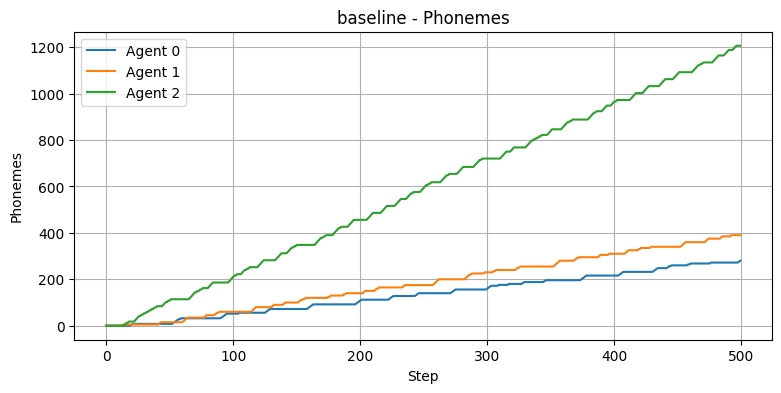

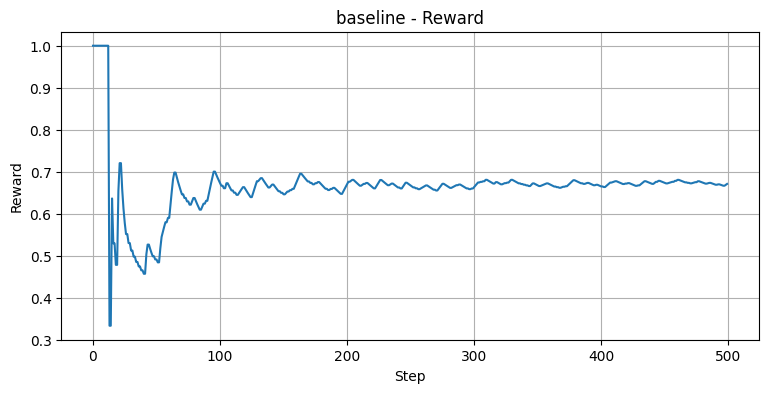

In [3]:
env_stare = GuestEnv(max_steps=500, reward_shaping=False)  # Shorter episodes for more frequent logging
actions = [1]*500
p, r = run_env(env_stare, actions,steps=500)
plot_results(p, r, 'baseline')

2025-10-24 09:16:38 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.04069780242779817
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.044697802427798174
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.04869780242779818
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.05269780242779818
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.056697802427798184
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.06069780242779819
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.06469780242779818
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.06869780242779819
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.07269780242779819
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.0766978024277982
2025-10-24 09:16:38 | INFO | 0.002
2025-10-24 09:16:38 | INFO | 0.08069780

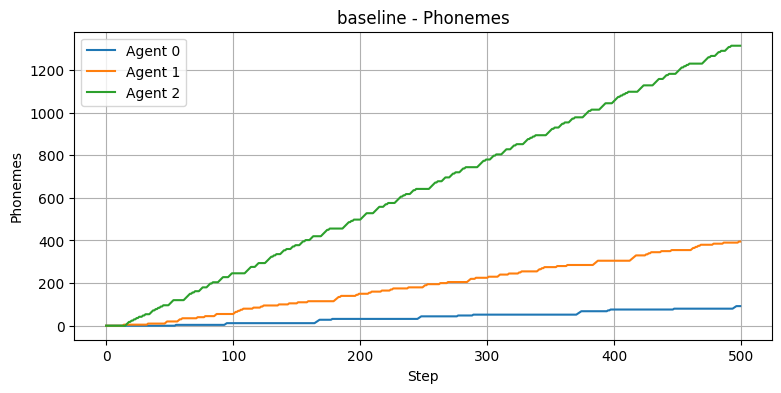

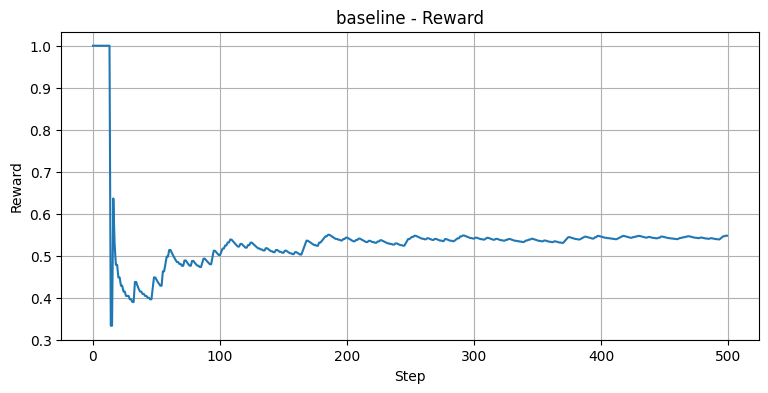

In [4]:
env_stare_env_effect= GuestEnv(max_steps=500, reward_shaping=False, env_effect=True)  # Shorter episodes for more frequent logging
actions = [1]*500
p_e, r_e = run_env(env_stare_env_effect, actions, steps=500)
plot_results(p_e, r_e, 'baseline')

# env_effect_step - change the encurege affect 

2025-10-24 09:24:40 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-10-24 09:24:40 | INFO | delta=0.9
2025-10-24 09:24:40 | INFO | buff={'amount': 0.9, 'remaining': 10}
2025-10-24 09:24:40 | INFO | delta=0.9
2025-10-24 09:24:40 | INFO | buff={'amount': 0.9, 'remaining': 10}
2025-10-24 09:24:40 | INFO | delta=0.9
2025-10-24 09:24:40 | INFO | buff={'amount': 0.9, 'remaining': 10}
2025-10-24 09:24:40 | INFO | delta=0.9
2025-10-24 09:24:40 | INFO | buff={'amount': 0.9, 'remaining': 10}
2025-10-24 09:24:40 | INFO | delta=0.9
2025-10-24 09:24:40 | INFO | buff={'amount': 0.9, 'remaining': 10}
2025-10-24 09:24:40 | INFO | delta=0.9
2025-10-24 09:24:40 | INFO | buff={'amount': 0.9, 'remaining': 10}
2025-10-24 09:24:40 | INFO | delta=0.9
2025-10-24 09:24:40 | INFO | buff={'amount': 0.9, 'remaining': 10}
2025-10-24 09:24:40 | INFO | delta=0.9
2025-10-24 09:24:40 | INFO | buff={'amount': 0.9, 'remaining': 10}
2025-10-24 09:24:40 | INFO | delta=0.9
2025-10-24 09:24:40 | INFO |

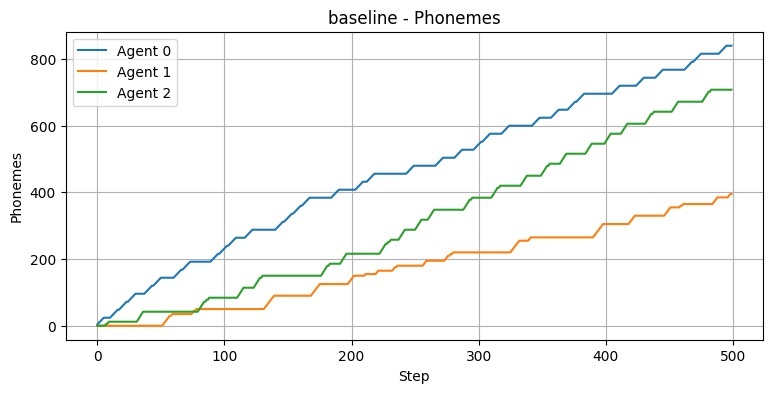

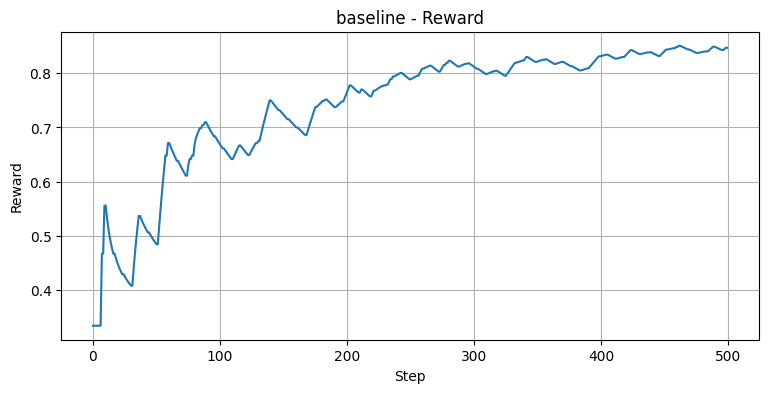

In [3]:
env_enc = GuestEnv(max_steps=500, reward_shaping=False)  # Shorter episodes for more frequent logging
actions = [4]*500
p_en, r_en = run_env(env_enc, actions, steps=500)
plot_results(p_en, r_en, 'baseline')

2025-10-24 09:25:45 | INFO | self.energy=array([0.0386978 , 0.27555138, 0.44343917])
2025-10-24 09:25:45 | INFO | delta=0.2
2025-10-24 09:25:45 | INFO | buff={'amount': 0.2, 'remaining': 10}
2025-10-24 09:25:45 | INFO | delta=0.2
2025-10-24 09:25:45 | INFO | buff={'amount': 0.2, 'remaining': 10}
2025-10-24 09:25:45 | INFO | delta=0.2
2025-10-24 09:25:45 | INFO | buff={'amount': 0.2, 'remaining': 10}
2025-10-24 09:25:45 | INFO | delta=0.2
2025-10-24 09:25:45 | INFO | buff={'amount': 0.2, 'remaining': 10}
2025-10-24 09:25:45 | INFO | delta=0.2
2025-10-24 09:25:45 | INFO | buff={'amount': 0.2, 'remaining': 10}
2025-10-24 09:25:45 | INFO | delta=0.2
2025-10-24 09:25:45 | INFO | buff={'amount': 0.2, 'remaining': 10}
2025-10-24 09:25:45 | INFO | delta=0.2
2025-10-24 09:25:45 | INFO | buff={'amount': 0.2, 'remaining': 10}
2025-10-24 09:25:45 | INFO | delta=0.2
2025-10-24 09:25:45 | INFO | buff={'amount': 0.2, 'remaining': 10}
2025-10-24 09:25:45 | INFO | delta=0.2
2025-10-24 09:25:45 | INFO |

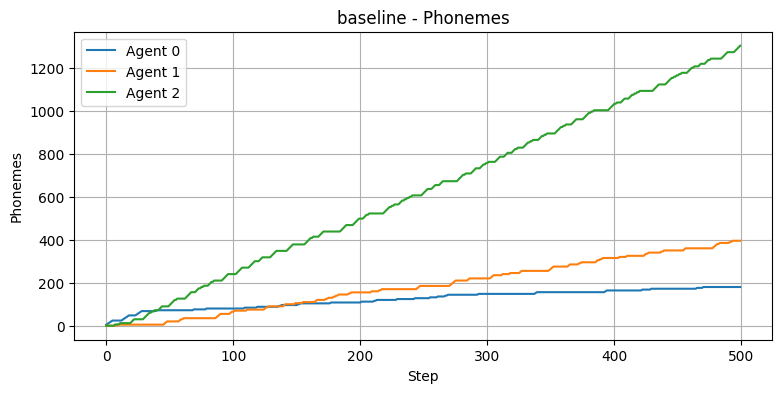

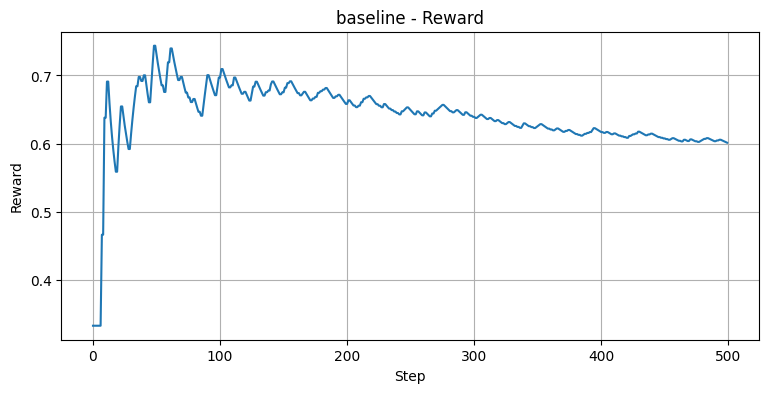

In [6]:
env_enc_env_effect= GuestEnv(max_steps=500, reward_shaping=False, env_effect=True, env_effect_encourage_step=100)  # Shorter episodes for more frequent logging
actions = [4]*500
p_enc, r_enc = run_env(env_enc_env_effect, actions, steps=500)
plot_results(p_enc, r_enc, 'baseline')